# Q1.-Glass Identification:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

### https://github.com/dsrscientist/dataset3

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")

In [3]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


### Let's give the Heading in our data set.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv',header = None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type'],
      dtype='object')

In [7]:
df.shape

(214, 11)

In our data set there is 214 rows and 11 columns.

In [8]:
df.dtypes

Id number      int64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
Type           int64
dtype: object

In [9]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

The data set is pretty unbalanced.The instances of type 1 and 2 constitute more than 67% of the glass type.

In [10]:
# checkking the missing values
df.isnull().sum()

Id number    0
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
Type         0
dtype: int64

there is no null value in our df

In [11]:
# checking duplicate value
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

no duplicate values in our dataset.

In [12]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


# EDA:

Text(0.5, 1.0, 'Distributin of Classes')

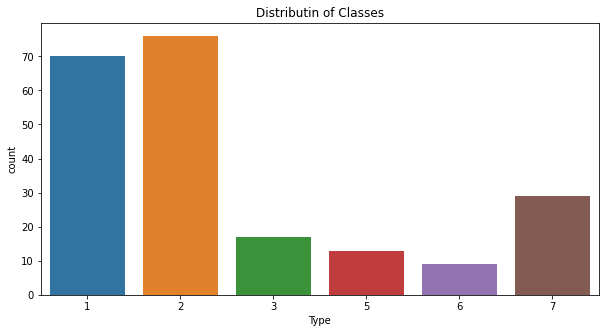

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df['Type'])
plt.title('Distributin of Classes')

This tis the distribution of types in diffrebt classes.

In [15]:
df.var()

Id number    3834.166667
RI              0.000009
Na              0.666841
Mg              2.080540
Al              0.249270
Si              0.599921
K               0.425354
Ca              2.025366
Ba              0.247227
Fe              0.009494
Type            4.425716
dtype: float64

# visualization:

1.6254305060087644
4.931737386095595


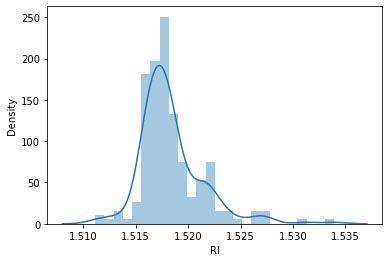

In [16]:
# checking the skewness
sns.distplot(df['RI'])

print(df['RI'].skew())

print(df['RI'].kurt())

Here we can see in RI (refractive index) the skew is Present.

-1.1525593175802356
-0.4103189628915671


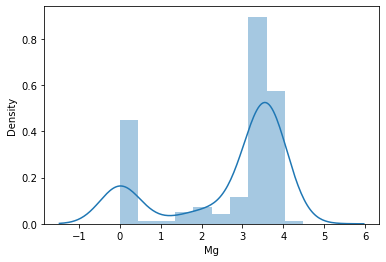

In [17]:
sns.distplot(df['Mg'])

print(df['Mg'].skew())

print(df['Mg'].kurt())

In Mg(Magnesium) It looks like a normal distrribution and skew is noot present.

0.4541814536577495
3.0522324094919218


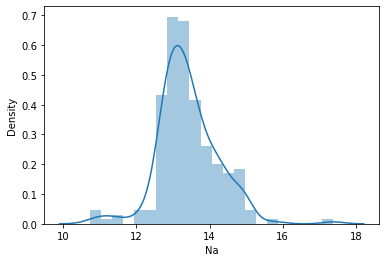

In [18]:
sns.distplot(df['Na'])

print(df['Na'].skew())

print(df['Na'].kurt())

There is no skewneess is present in Na(Sodium)so we can say that it is Normaly distributed.

1.754327470435831
2.662015617441455


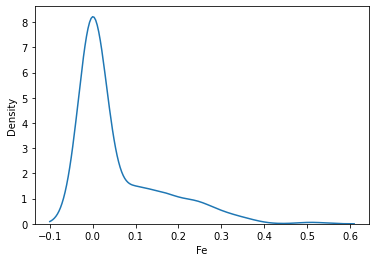

In [19]:
sns.kdeplot(df['Fe'])

print(df['Fe'].skew())

print(df['Fe'].kurt())

Fe(Iron) have also Right Skewness is presnt.

3.4164245693025577
12.541083582809152


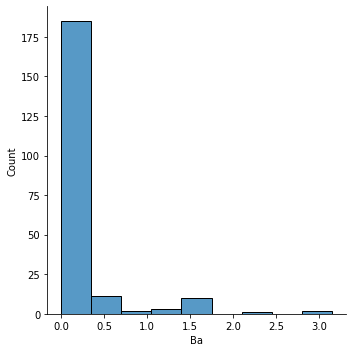

In [20]:
sns.displot(df['Ba'])

print(df['Ba'].skew())

print(df['Ba'].kurt())

There is highly skewness is Present in Ba(Barium)

2.0470539131183103
6.681977951411165


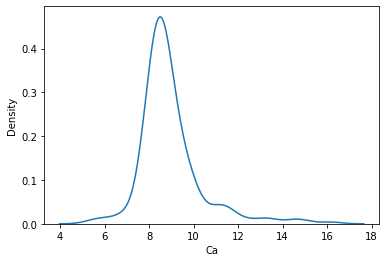

In [21]:
sns.kdeplot(df['Ca'])

print(df['Ca'].skew())

print(df['Ca'].kurt())

there is also highly Skewness is present in Ca(Calsium)

0.9072898090246346
2.0605689689461246


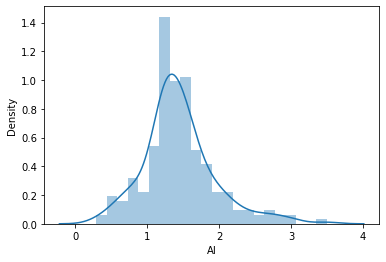

In [22]:
sns.distplot(df['Al'])

print(df['Al'].skew())

print(df['Al'].kurt())

Al (Aluminium)is looks like Normal distribution.

6.55164830960496
54.689698529942525


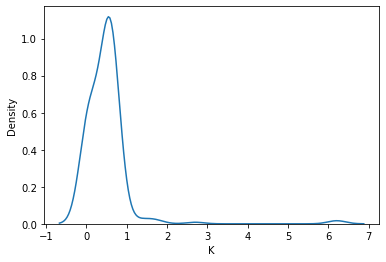

In [23]:
sns.kdeplot(df['K'])

print(df['K'].skew())

print(df['K'].kurt())

In K(Potasium) there is high skewness is present.

-0.7304472251318588
2.967902955966007


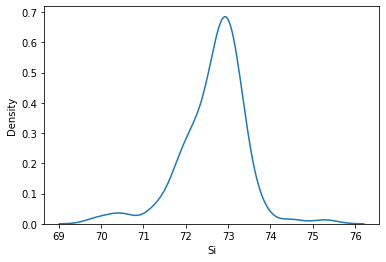

In [24]:
sns.kdeplot(df['Si'])

print(df['Si'].skew())

print(df['Si'].kurt())

In Si(Silicon) the skewness is not present it looks like almost Normal distribution.

### Lets visualized some correlations.

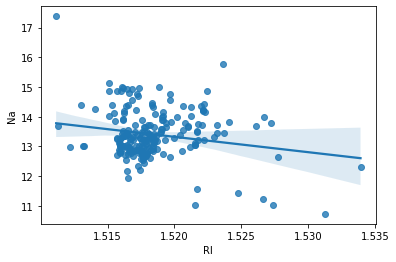

In [25]:
sns.regplot(x='RI',y='Na',data=df)
plt.show()

RI and Na have strong relationship.

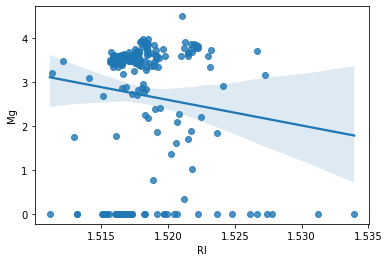

In [26]:
sns.regplot(x='RI',y='Mg',data=df)
plt.show()

RI and Mg have also strong relation.

### Detect the outliers:

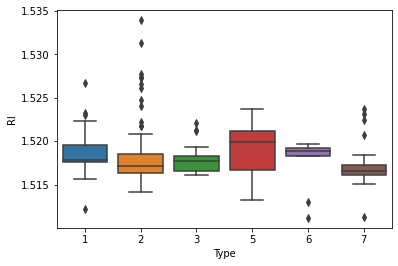

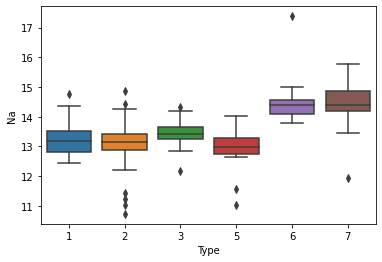

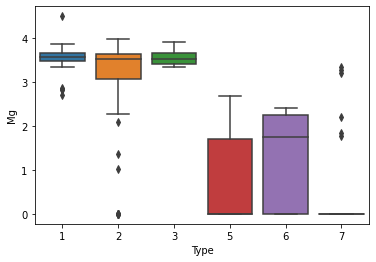

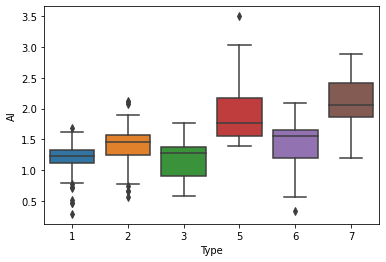

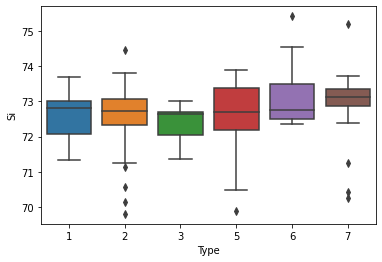

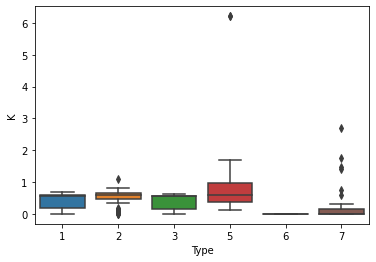

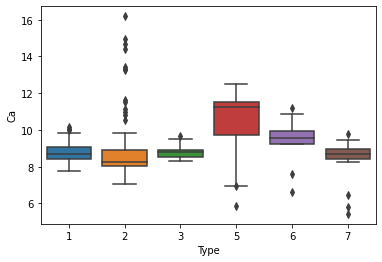

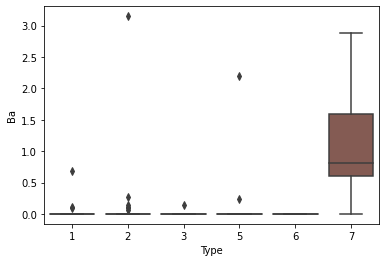

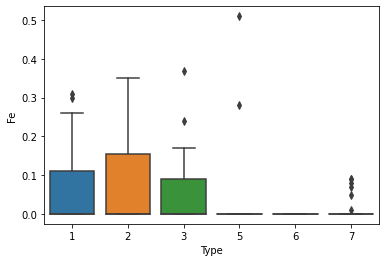

In [27]:
col = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']

for i in range(0,9):
    sns.boxplot(y=col[i],x='Type',data=df)
    plt.show()

The dimond shaped dots outside the boxplot indicates the outliers There are some extreme cases in K,Baand Fe.

<AxesSubplot:>

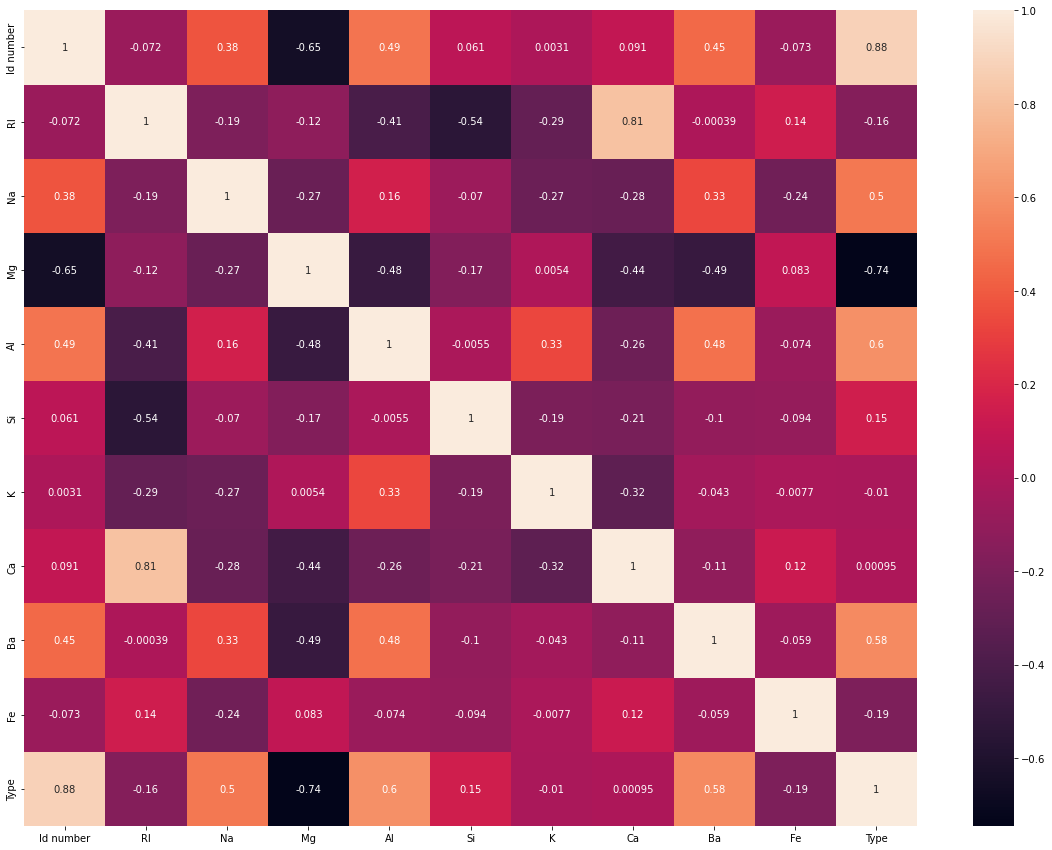

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

### Feature Transformation

In [29]:
df.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Id number,0.000000,-1.200000
RI,1.625431,4.931737
Na,0.454181,3.052232
Mg,-1.152559,-0.410319
Al,0.907290,2.060569
Si,-0.730447,2.967903
K,6.551648,54.689699
Ca,2.047054,6.681978
Ba,3.416425,12.541084
Fe,1.754327,2.662016


.From the upper obseration there  is skew and Outliers are presents.

### Let's Eleminate the Skew:

In [30]:
df['RI'] =np.sqrt(df['RI'])
df['K'] = np.sqrt(df['K']) 
df['Ca'] =np.sqrt(df['Ca'])
df['Ba']=np.sqrt(df['Ba'])
df['Fe']=np.sqrt(df['Fe'])
                

1.6191430663221709
4.903158530222255


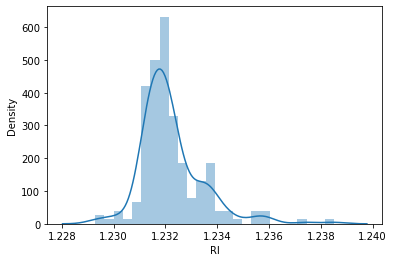

In [31]:
sns.distplot(df['RI'])

print(df['RI'].skew())

print(df['RI'].kurt())

<AxesSubplot:xlabel='Fe', ylabel='Density'>

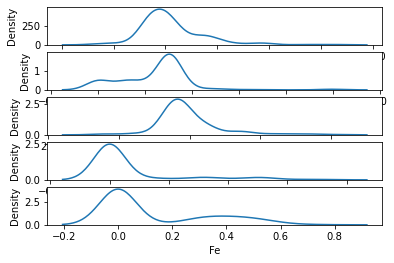

In [32]:
fig,axes=plt.subplots(5)
sns.kdeplot(df['RI'],ax=axes[0])
sns.kdeplot(df['K'],ax=axes[1])
sns.kdeplot(df['Ca'],ax=axes[2])
sns.kdeplot(df['Ba'],ax=axes[3])
sns.kdeplot(df['Fe'],ax=axes[4])

.Here we can see that all skewness will be eleminated in our data set.

### Seprating the Features and label:

In [33]:
x = df.drop('Type',axis=1)
y = df['Type']

### Using StandarScalrization:

In [34]:
Scaler =StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x),columns = x.columns)
x

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-1.723976,0.873686,0.284953,1.254639,-0.692442,-1.127082,-0.992606,-0.117724,-0.417679,-0.6609
1,-1.707788,-0.249066,0.591817,0.636168,-0.170460,0.102319,0.243070,-0.831001,-0.417679,-0.6609
2,-1.691601,-0.721658,0.149933,0.601422,0.190912,0.438787,0.054574,-0.870937,-0.417679,-0.6609
3,-1.675413,-0.232546,-0.242853,0.698710,-0.310994,-0.052974,0.414578,-0.523778,-0.417679,-0.6609
4,-1.659226,-0.311845,-0.169205,0.650066,-0.411375,0.555256,0.377708,-0.641059,-0.417679,-0.6609
...,...,...,...,...,...,...,...,...,...,...
209,1.659226,-0.705130,0.898681,-1.865511,2.881125,-0.052974,-0.888057,0.202760,2.249144,-0.6609
210,1.675413,-0.500206,1.856097,-1.865511,1.094342,0.529374,-1.668419,-0.384443,2.848499,-0.6609
211,1.691601,0.754865,1.168721,-1.865511,1.154570,0.995252,-1.668419,-0.353683,2.899457,-0.6609
212,1.707788,-0.612578,1.193270,-1.865511,0.993960,1.241133,-1.668419,-0.322996,2.827892,-0.6609


We use this methode to over come to the biasness.

In [35]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [36]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [37]:
# checking the count value 
y.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type, dtype: int64

### Testing and Spliting:

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state =41)

In [39]:
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score

In [40]:
def metric_score(clf, x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==========Train Result=========")
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100: .2f}%")
        
    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n=========Train Result========")
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100: .2f}%")
        
        print('\n \n Test Cassification Report \n',classification_report(y_test,pred,digits=2))

### Model Training:

### For DecisionTreeClassifier:

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
Dec = DecisionTreeClassifier()
Dec.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
metric_score(Dec,x_train,x_test,y_train,y_test,train=True)

metric_score(Dec,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  99.12%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        20

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



### RandomForestClassifier:

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
metric_score(RFR,x_train,x_test,y_train,y_test,train=True)
metric_score(RFR,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  98.25%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        18
           3       0.95      1.00      0.97        19
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        17
           7       1.00      0.95      0.97        20

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### AdaBoostClassifier Model:

In [47]:
from sklearn.ensemble import AdaBoostClassifier

In [48]:
Adb = AdaBoostClassifier()
Adb.fit(x_train,y_train)

AdaBoostClassifier()

In [49]:
metric_score(Adb,x_train,x_test,y_train,y_test,train=True)
metric_score(Adb,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  50.58%

=========Train Result========
Accuracy Score:  48.25%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        22
           6       0.23      1.00      0.37        17
           7       1.00      1.00      1.00        20

    accuracy                           0.48       114
   macro avg       0.36      0.50      0.39       114
weighted avg       0.36      0.48      0.38       114



### GradientBoostingClassifier:

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
Grb =GradientBoostingClassifier ()
Grb.fit(x_train,y_train)

GradientBoostingClassifier()

In [52]:
metric_score(Grb,x_train,x_test,y_train,y_test,train=True)
metric_score(Grb,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  98.25%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        18
           3       1.00      0.95      0.97        19
           5       1.00      1.00      1.00        22
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        20

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Cross-Validation-Score:

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
#checkig cv score for DecisionTreeClassifier
score = cross_val_score(Dec,x,y)
print(score)
print(score.mean())

[0.91304348 1.         1.         1.         0.85714286]
0.9540372670807453


In [55]:
# checking cv score for RandomForestClassifier
score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())

[0.95652174 1.         0.97802198 1.         0.87912088]
0.9627329192546583


In [56]:
# checking cv score for AdaBoostClassifier
score = cross_val_score(Adb,x,y)
print(score)
print(score.mean())

[0.58695652 0.49450549 0.49450549 0.49450549 0.43956044]
0.5020066889632107


In [57]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(Grb,x,y)
print(score)
print(score.mean())

[0.89130435 1.         1.         1.         0.85714286]
0.9496894409937887


### Hypertuning Parameters:

In [60]:
#  RandomForestClassifier:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth':[2,8,],
              'max_features':[0.2,0.6,1.0],
              'n_estimators':[20,60,100,120],
              'max_samples':[0.5,0.75,1.0],
              'criterion':['gini','entropy'],
              'bootstrap':[True,False]}
             
             

In [61]:
RFR=  RandomizedSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [62]:
RFR.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 8],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 120]})

In [63]:
RFR.best_params_

{'n_estimators': 20,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': 8,
 'criterion': 'entropy',
 'bootstrap': True}

In [64]:
Final_model = RandomForestClassifier(n_estimators = 20,max_samples= 1.0, max_features= 1.0,max_depth= 8,criterion= 'gini',bootstrap='True')
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

99.12280701754386


### Save the Model:

In [65]:
# we use joblib methode for save the model
import joblib
joblib.dump(Final_model,"Glass Identification")

['Glass Identification']

In [66]:
# load the saved model
model = joblib.load("Glass Identification")

#pediction
prediction = model.predict(x_test)
prediction

array([6, 5, 3, 1, 3, 5, 7, 1, 5, 7, 2, 3, 1, 5, 7, 7, 1, 7, 3, 5, 7, 1,
       7, 7, 6, 1, 5, 5, 5, 5, 1, 7, 7, 5, 6, 7, 7, 3, 3, 1, 5, 3, 2, 6,
       7, 5, 5, 5, 2, 6, 6, 5, 1, 7, 2, 5, 7, 6, 1, 7, 2, 2, 6, 6, 3, 1,
       3, 2, 7, 2, 1, 6, 2, 6, 6, 3, 3, 5, 6, 2, 5, 5, 2, 7, 3, 6, 2, 2,
       3, 1, 1, 2, 2, 6, 6, 1, 6, 3, 3, 7, 3, 5, 5, 1, 1, 5, 3, 2, 7, 1,
       2, 3, 3, 1], dtype=int64)

These are our prediction values.

### Q2. Bank Marketing :Term Deposit Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
df.shape

(31647, 18)

In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
#checking the null values
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


### Explore the Catagorical Features:

In [11]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O')& (feature not in['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

 .There is 9 catagorical features

### Find Categorical features Distriution:

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


<AxesSubplot:xlabel='job', ylabel='count'>

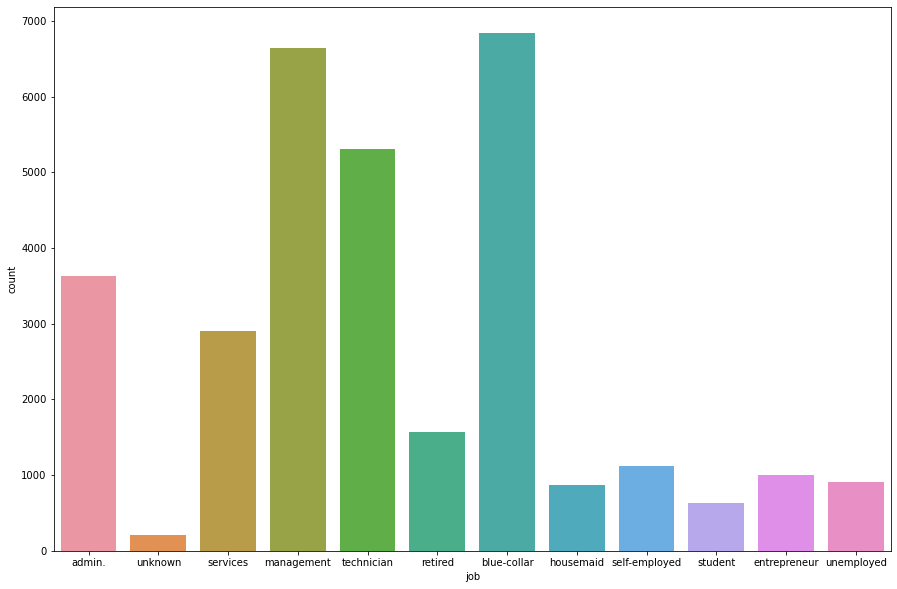

In [12]:
plt.figure(figsize=(15,10))
print((df['job'].value_counts()))
sns.countplot(df['job'])

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


<AxesSubplot:xlabel='marital', ylabel='count'>

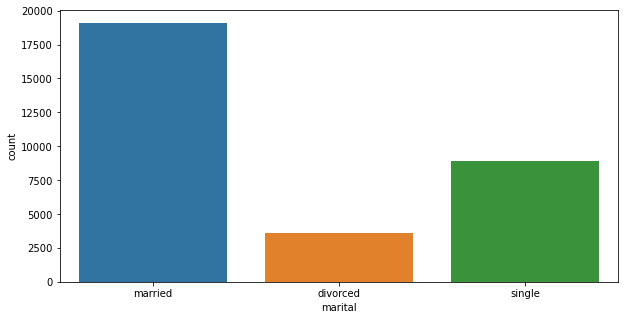

In [13]:
plt.figure(figsize=(10,5))
print((df['marital'].value_counts()))
sns.countplot(df['marital'])

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


<AxesSubplot:xlabel='education', ylabel='count'>

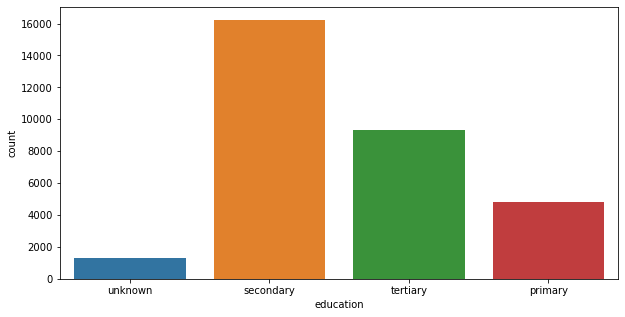

In [14]:
plt.figure(figsize=(10,5))
print((df['education'].value_counts()))
sns.countplot(df['education'])

no     31062
yes      585
Name: default, dtype: int64


<AxesSubplot:xlabel='default', ylabel='count'>

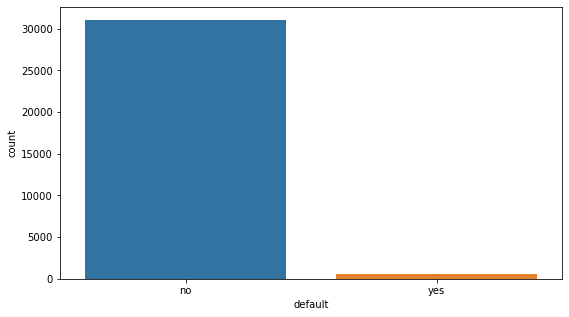

In [15]:
plt.figure(figsize=(9,5))
print((df['default'].value_counts()))
sns.countplot(df['default'])

yes    17584
no     14063
Name: housing, dtype: int64


<AxesSubplot:xlabel='housing', ylabel='count'>

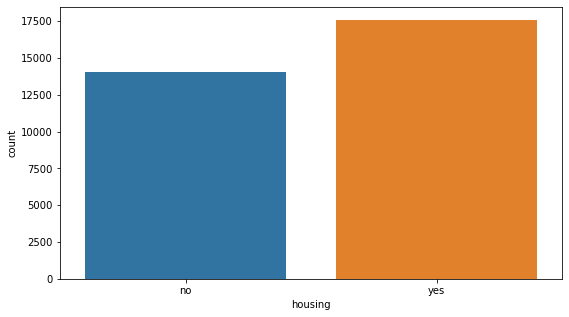

In [16]:
plt.figure(figsize=(9,5))
print((df['housing'].value_counts()))
sns.countplot(df['housing'])

no     26516
yes     5131
Name: loan, dtype: int64


<AxesSubplot:xlabel='loan', ylabel='count'>

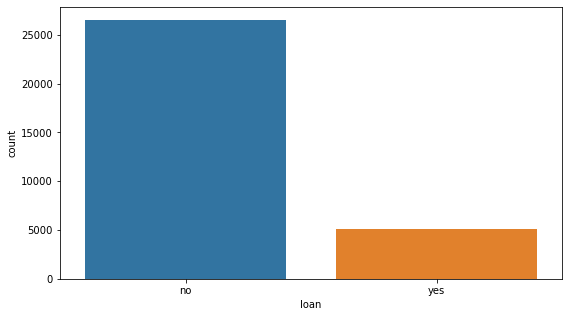

In [17]:
plt.figure(figsize=(9,5))
print((df['loan'].value_counts()))
sns.countplot(df['loan'])

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


<AxesSubplot:xlabel='contact', ylabel='count'>

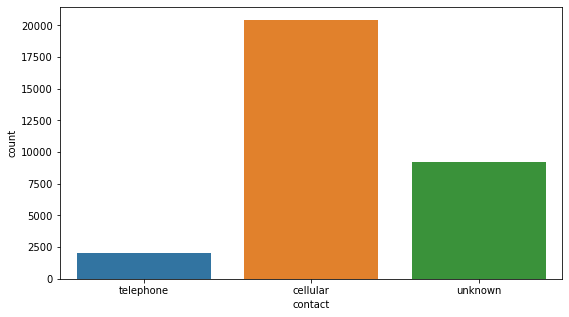

In [18]:
plt.figure(figsize=(9,5))
print((df['contact'].value_counts()))
sns.countplot(df['contact'])

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

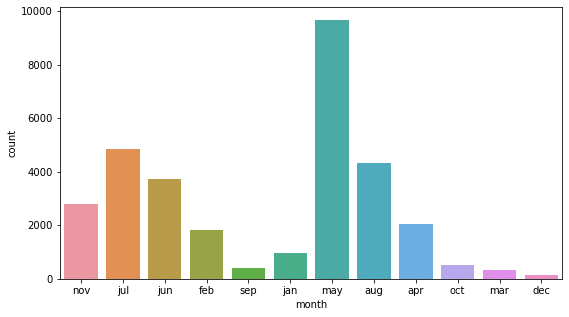

In [19]:
plt.figure(figsize=(9,5))
print((df['month'].value_counts()))
sns.countplot(df['month'])

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


<AxesSubplot:xlabel='poutcome', ylabel='count'>

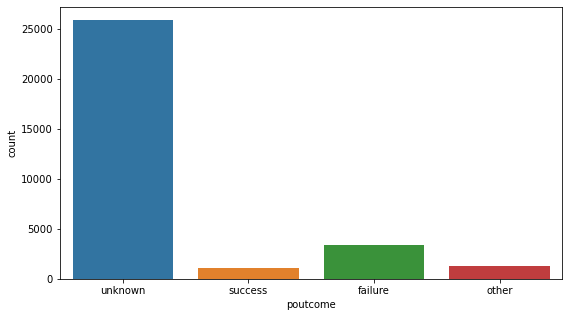

In [20]:
plt.figure(figsize=(9,5))
print((df['poutcome'].value_counts()))
sns.countplot(df['poutcome'])

### upper observation:

### Relationship between Categorical Features and Label

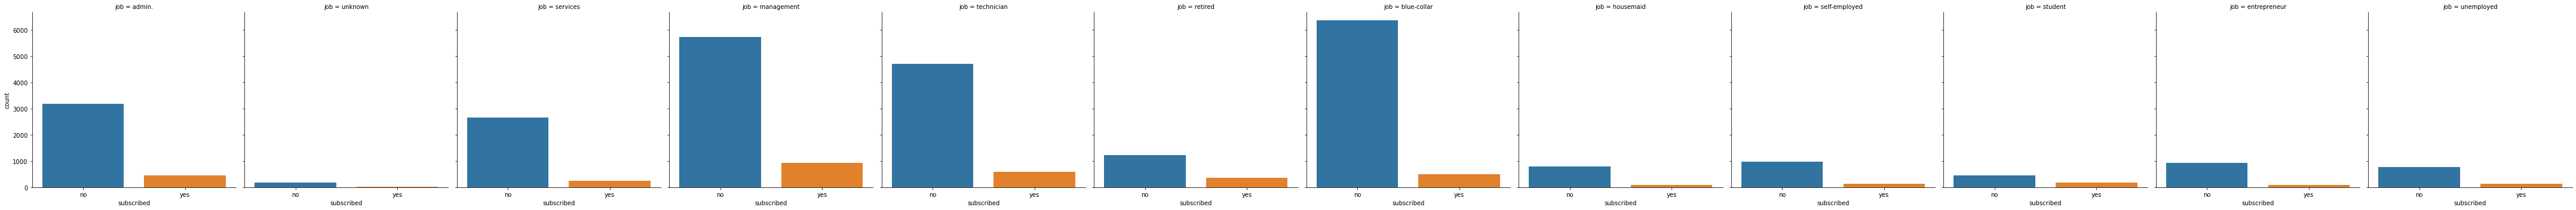

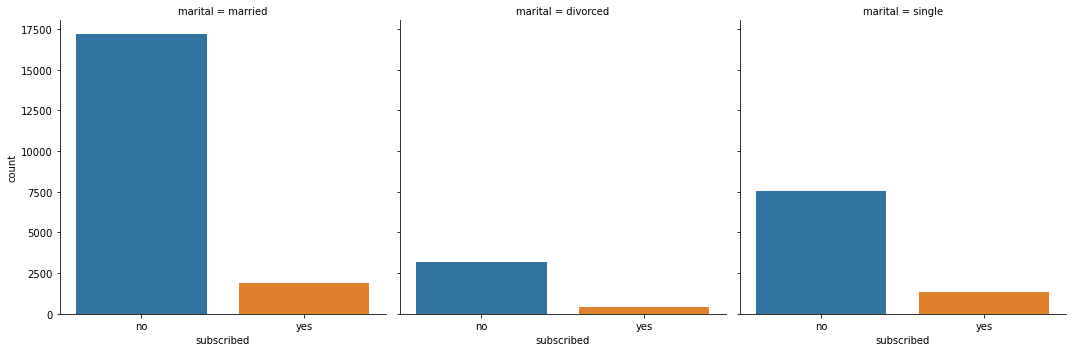

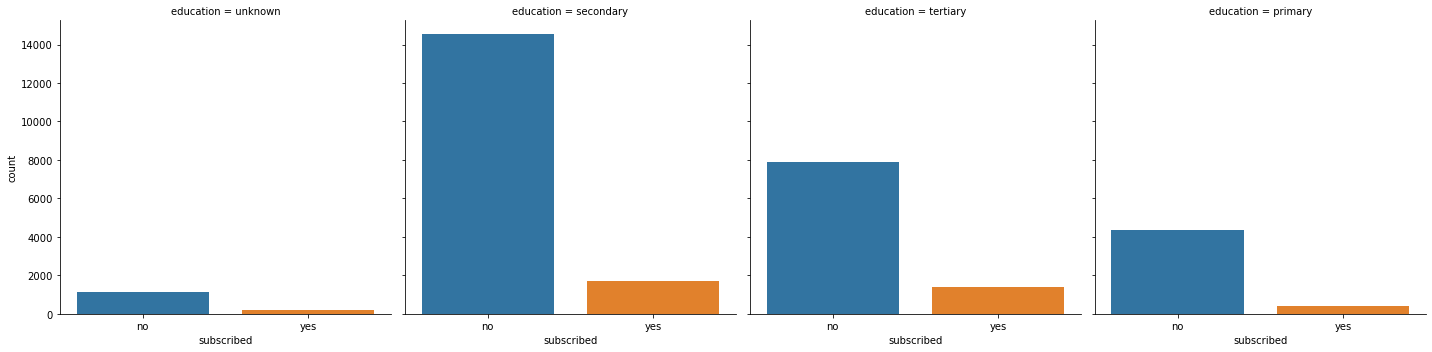

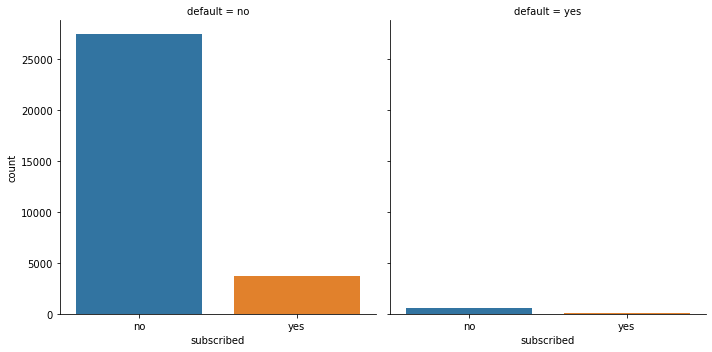

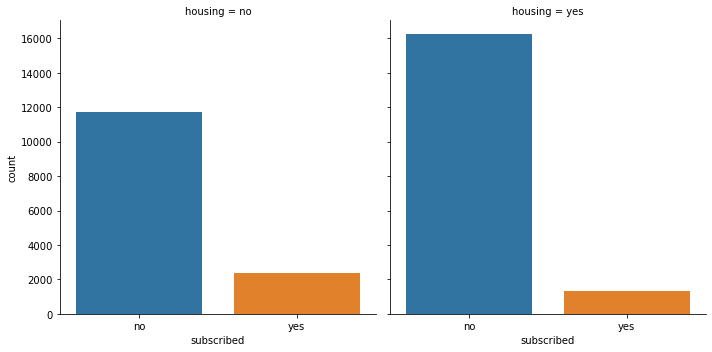

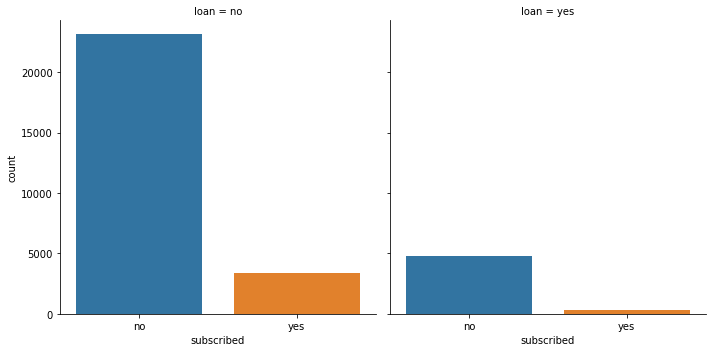

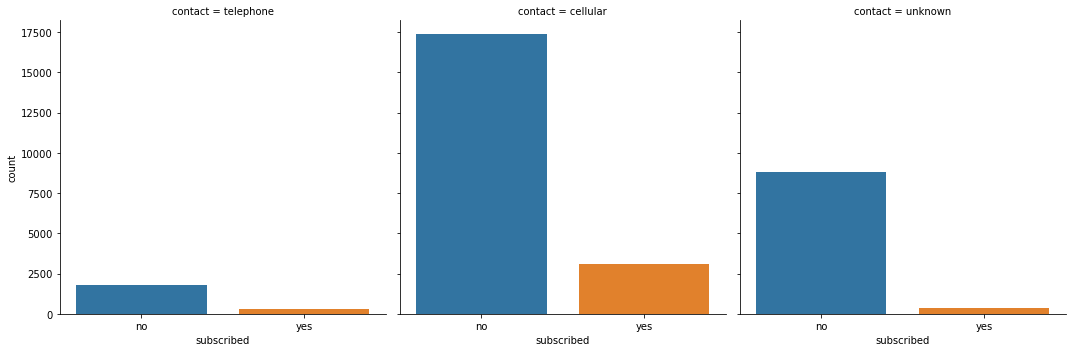

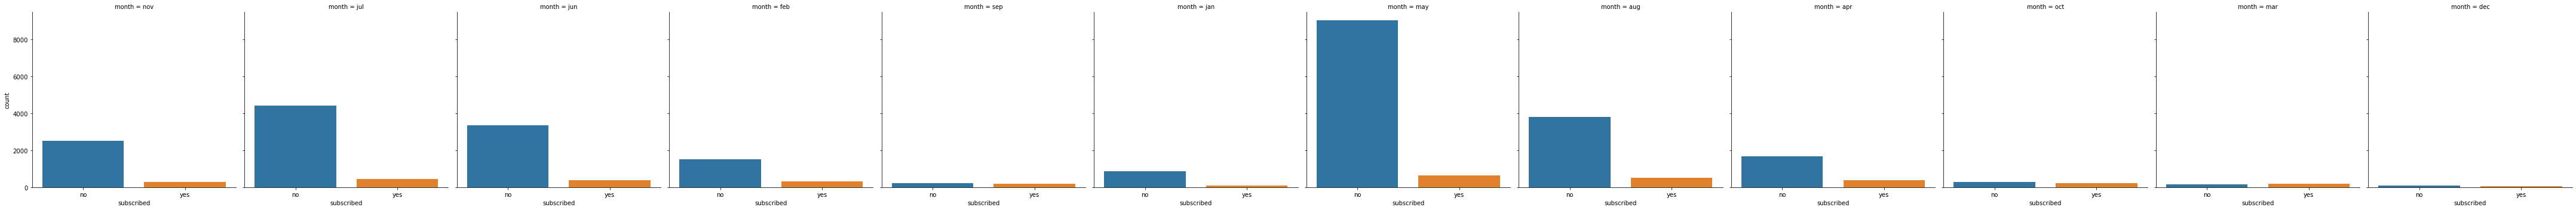

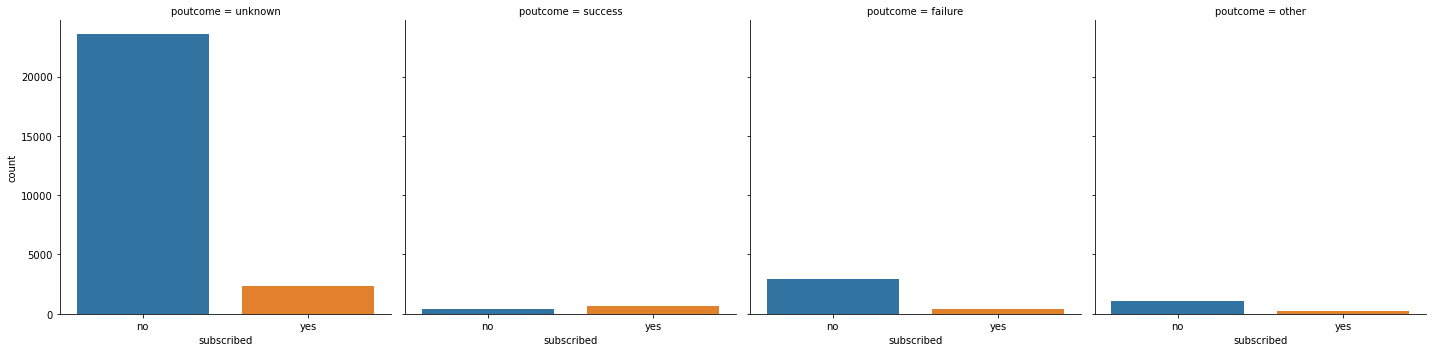

In [21]:
for categorical_feature in categorical_features:
    sns.catplot(x='subscribed',col=categorical_feature,kind='count',data=df)
plt.show()

In [22]:
# Check target label split  over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['subscribed',categorical_feature]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

### observation:

### Let's find the Continous Numerical Features:

In [23]:
#list f numerical features
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes !='O') &(feature not in ['subscribed']))]
print('Number of Numerical variables:',len(numerical_features))

df[numerical_features].head()

Number of Numerical variables: 8


,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0


there are 8 numerical features.

In [24]:
# find the Discreat Numerical Features
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete The Variable Count: {}".format(len(discrete_feature)))

Discrete The Variable Count: 0


There is no descrete value of given dataset.

In [25]:
continous_features = [feature for feature in numerical_features if feature not in discrete_feature+['subscribed']]
print("Continous feature Count{}",format(len(continous_features)))

Continous feature Count{} 8


### Distribution of continos Fatures:

0.6816067818884382
0.2979752561545168


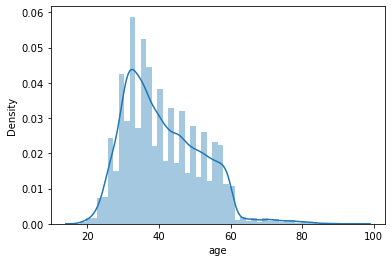

In [26]:
# distribution with Age.
sns.distplot(df['age'])

print(df['age'].skew())

print(df['age'].kurt())

7.995695573886313
126.4512830433201


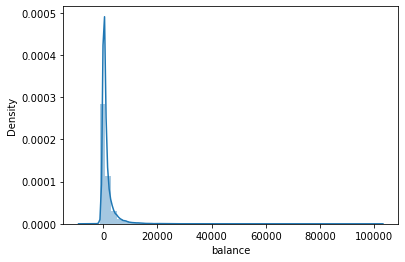

In [27]:
# disribution of balance
sns.distplot(df['balance'])

print(df['balance'].skew())

print(df['balance'].kurt())

0.08718543483770899
-1.0673970109865178


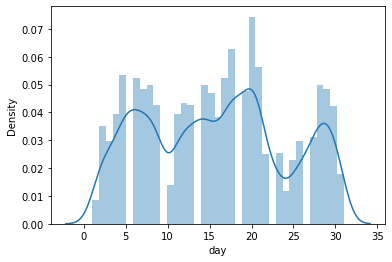

In [28]:
# distibution of day
sns.distplot(df['day'])

print(df['day'].skew())

print(df['day'].kurt())

3.1997657339236736
19.48762713706081


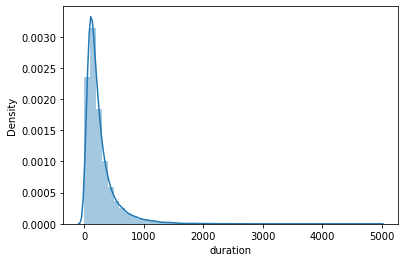

In [29]:
# distribution of duration
sns.distplot(df['duration'])

print(df['duration'].skew())

print(df['duration'].kurt())

4.873934933081073
38.05799531921156


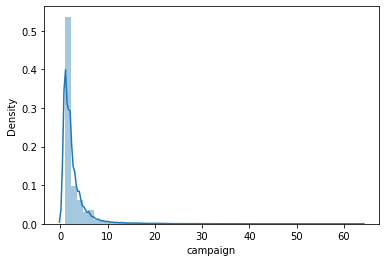

In [30]:
#distributin of campaign
sns.distplot(df['campaign'])

print(df['campaign'].skew())
print(df['campaign'].kurt())

2.642374162969253
7.111294692528443


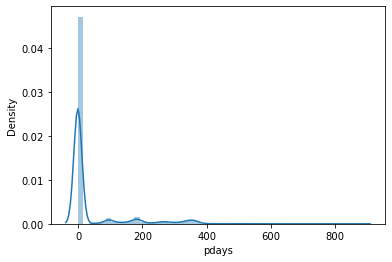

In [31]:
# distribution of pdays
sns.distplot(df['pdays'])
print(df['pdays'].skew())
print(df['pdays'].kurt())

49.30234792386907
5236.411573858868


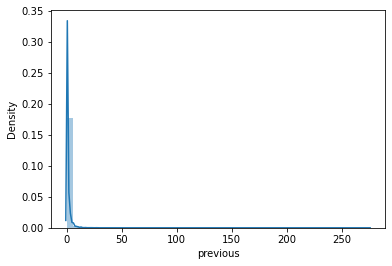

In [32]:
# distribution of previous
sns.distplot(df['previous'])
print(df['previous'].skew())
print(df['previous'].kurt())

### Observation

### Lets check the utliers in numerical values.

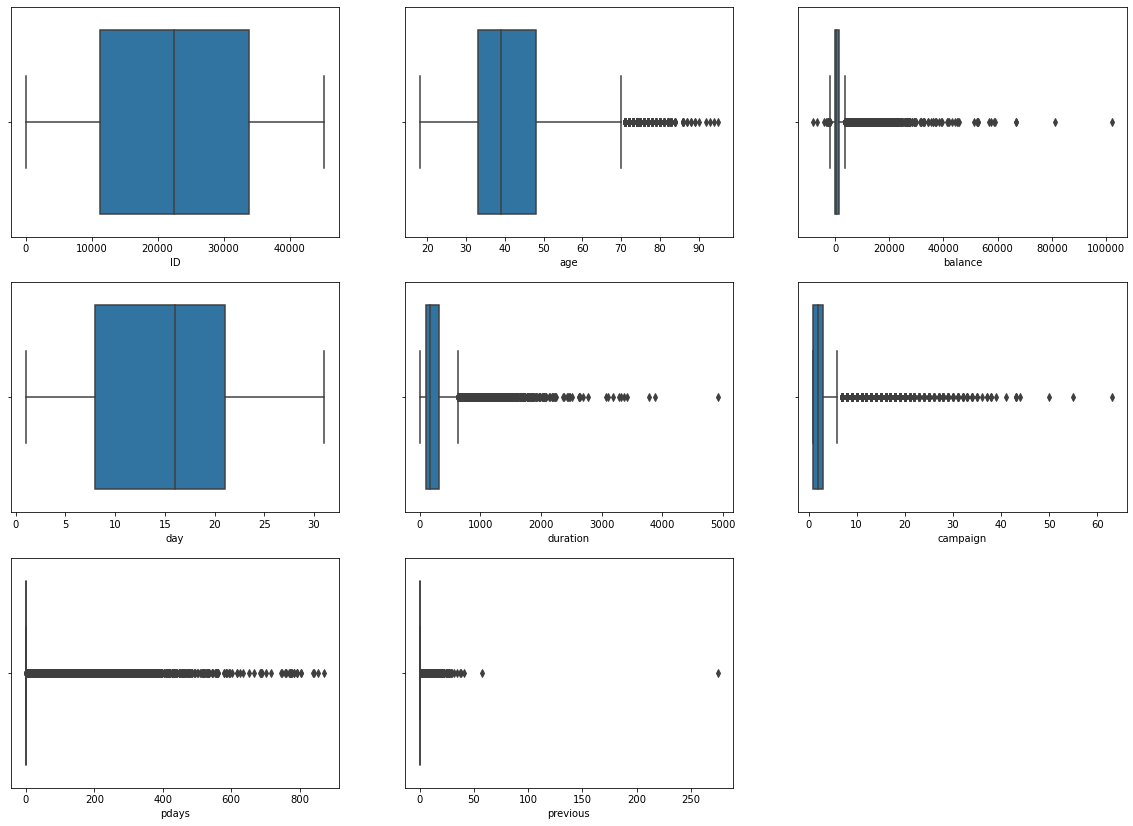

In [33]:
plt.figure(figsize=(20,60),facecolor ='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Observation:

Age,balance,duration,campagin and pdays has some outliers.

### Now let us Explore the correlation b/wt the numerical values.

<AxesSubplot:>

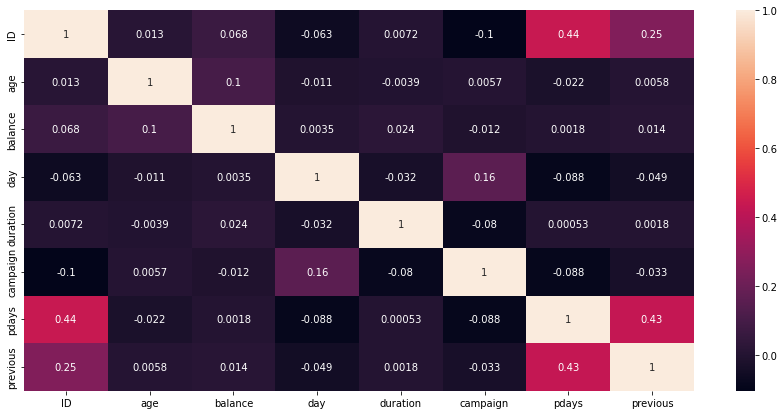

In [34]:
# checking the correlation between numerical values
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot =True)

as m observation there is no features which are correlated with each other.

### Features Engineering:

In [35]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [36]:
df.groupby(['subscribed','default']).size()

subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

here we can see that default features have mostly no value this feature is not imprtant so we can remove this.

In [37]:
# lets drop the default,ID,pdays frm the  column because these column have not important role.
df.drop(['default','pdays','ID'],axis=1,inplace=True)

In [38]:
# nw let's eleminate the outliers.
df.groupby('age',sort=True)['age'].count()
#these can be ignored and values lies in between 18 to 95

age
18     8
19    22
20    39
21    48
22    86
      ..
90     1
92     1
93     1
94     1
95     1
Name: age, Length: 76, dtype: int64

In [39]:
# nw let's eleminate the outliers.
df.groupby(['subscribed','balance'],sort=True)['balance'].count()
# these utliers should not be remove as balance goes high ,client show intrest on deposit

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

In [40]:
# nw let's eleminate the outliers.
df.groupby(['subscribed','duration'],sort=True)['duration'].count()

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

this is also same the client show intrested in duration diposits are high so we not going to remove any outliers from this clumn.

In [41]:
# nw let's eleminate the outliers.
df.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

In [42]:
df = df[df['campaign']<33]

In [43]:
df.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
            6             845
            7             484
            8             335
            9             221
            10            173
            11            115
            12            100
            13             88
            14             65
            15             58
            16             52
            17             46
            18             37
            19             30
            20             36
            21             19
            22             18
            23             13
            24             12
            25             17
            26              9
            27              8
            28             14
            29             12
            30              6
            31              9
            32              5
yes         1      

Here we remove the outliers which are above the 32

In [44]:
df.groupby(['subscribed','previous'],sort=True)['previous'].count()

subscribed  previous
no          0           23525
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
            32              1
            35              1
            37     

In [45]:
df = df[df['previous'] < 31]

In [46]:
df.groupby(['subscribed','previous'],sort=True)['previous'].count()

subscribed  previous
no          0           23525
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
yes         0            2371
            1             422
            2      

.in previous column after 31 we considring as a ouliers.
.So we removed these outliers.

### Now lets handale the catagrical features:

In [47]:
oneHotCols = ['job','marital','education','contact','month','poutcome']
df = pd.get_dummies(df,columns=oneHotCols)

In [48]:
bool_columns = ['housing','loan','subscribed']
for col in bool_columns:
    df[col+'_new']=df[col].apply(lambda x :1 if x =='yes' else 0)
    df.drop(col,axis =1,inplace = True)

In [49]:
df.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,subscribed_new
0,56,1933,19,44,2,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,31,3,20,91,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,27,891,18,240,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,57,3287,22,867,1,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,31,119,4,380,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


### Seprating the features and labels:

In [50]:
x = df.drop(['subscribed_new'],axis=1)
y = df['subscribed_new']

### Using StandardScaler

In [51]:
# using this methd for biasness
Scaler =StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x),columns = x.columns)
x

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,1.415290,0.187731,0.380686,-0.833458,-0.251506,-0.313186,2.777290,-0.525077,-0.181392,-0.168524,...,-0.663512,3.219169,-0.128308,-0.114489,-0.344804,-0.20576,-0.186992,0.469567,-1.117803,-0.439825
1,-0.937097,-0.449403,0.500689,-0.650658,-0.251506,-0.313186,-0.360063,-0.525077,-0.181392,-0.168524,...,-0.663512,-0.310639,-0.128308,-0.114489,-0.344804,-0.20576,-0.186992,0.469567,-1.117803,-0.439825
2,-1.313479,-0.156255,0.260683,-0.071144,-0.594249,-0.313186,-0.360063,-0.525077,-0.181392,-0.168524,...,-0.663512,-0.310639,-0.128308,-0.114489,-0.344804,-0.20576,-0.186992,0.469567,0.894612,-0.439825
3,1.509385,0.634716,0.740694,2.367481,-0.594249,1.368844,-0.360063,-0.525077,-0.181392,-0.168524,...,-0.663512,-0.310639,-0.128308,-0.114489,-0.344804,-0.20576,5.347827,-2.129620,-1.117803,-0.439825
4,-0.937097,-0.411109,-1.419356,0.473365,-0.594249,-0.313186,-0.360063,-0.525077,-0.181392,-0.168524,...,-0.663512,-0.310639,-0.128308,-0.114489,-0.344804,-0.20576,-0.186992,0.469567,0.894612,-0.439825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31607,-1.125288,-0.450393,-0.459334,-0.553424,-0.251506,-0.313186,-0.360063,-0.525077,-0.181392,-0.168524,...,1.507132,-0.310639,-0.128308,-0.114489,-0.344804,-0.20576,-0.186992,0.469567,0.894612,-0.439825
31608,1.133003,-0.324947,-1.299354,0.698948,-0.251506,-0.313186,-0.360063,-0.525077,-0.181392,-0.168524,...,-0.663512,-0.310639,-0.128308,-0.114489,-0.344804,-0.20576,-0.186992,0.469567,-1.117803,2.273631
31609,-0.843002,-0.347395,-1.059348,-0.860683,0.091237,-0.313186,-0.360063,-0.525077,-0.181392,-0.168524,...,-0.663512,-0.310639,-0.128308,-0.114489,-0.344804,-0.20576,-0.186992,0.469567,-1.117803,-0.439825
31610,1.509385,-0.376116,-0.099325,-0.919023,1.462208,6.414931,-0.360063,-0.525077,-0.181392,-0.168524,...,1.507132,-0.310639,-0.128308,-0.114489,2.900196,-0.20576,-0.186992,-2.129620,0.894612,-0.439825


In [52]:
#lets check the y counts
y.value_counts()

0    27898
1     3714
Name: subscribed_new, dtype: int64

In [53]:
#oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [54]:
y.value_counts()

0    27898
1    27898
Name: subscribed_new, dtype: int64

### Testiing and Spliting:

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state =42)

In [56]:
from sklearn.metrics  import confusion_matrix,classification_report,accuracy_score

In [57]:
def metric_score(clf, x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==========Train Result=========")
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100: .2f}%")
        
    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n=========Train Result========")
        
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100: .2f}%")
        
        print('\n \n Test Cassification Report \n',classification_report(y_test,pred,digits=2))

### Model-Training:

### Randomforest classifier model:

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
metric_score(RFC,x_train,x_test,y_train,y_test,train=True)
metric_score(RFC,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  94.97%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      6971
           1       0.93      0.97      0.95      6978

    accuracy                           0.95     13949
   macro avg       0.95      0.95      0.95     13949
weighted avg       0.95      0.95      0.95     13949



### XGBoostClassifier Model:

In [62]:
!pip install xgboost

In [58]:
from xgboost import XGBClassifier

In [59]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
metric_score(XGB,x_train,x_test,y_train,y_test,train=True)
metric_score(XGB,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  97.40%

=========Train Result========
Accuracy Score:  94.80%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      6971
           1       0.95      0.95      0.95      6978

    accuracy                           0.95     13949
   macro avg       0.95      0.95      0.95     13949
weighted avg       0.95      0.95      0.95     13949



### DecisionTreeClassifier Model:

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
DEC = DecisionTreeClassifier()
DEC.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
metric_score(DEC,x_train,x_test,y_train,y_test,train=True)
metric_score(DEC,x_train,x_test,y_train,y_test,train=False)


==========Train Result=========
Accuracy Score:  100.00%

=========Train Result========
Accuracy Score:  90.69%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      6971
           1       0.90      0.92      0.91      6978

    accuracy                           0.91     13949
   macro avg       0.91      0.91      0.91     13949
weighted avg       0.91      0.91      0.91     13949



### GradientBoostClassifier model:

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
GRD = GradientBoostingClassifier()
GRD.fit(x_train,y_train)

GradientBoostingClassifier()

In [69]:
metric_score(GRD,x_train,x_test,y_train,y_test,train = True)
metric_score(GRD,x_train,x_test,y_train,y_test,train = False)


==========Train Result=========
Accuracy Score:  91.78%

=========Train Result========
Accuracy Score:  91.91%

 
 Test Cassification Report 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      6971
           1       0.90      0.94      0.92      6978

    accuracy                           0.92     13949
   macro avg       0.92      0.92      0.92     13949
weighted avg       0.92      0.92      0.92     13949



In [70]:
#Now Checking The Cross-Validation Score for Models overfitting.

### Cross-Val-Score:

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# checking cv score for RandomForestClassifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())

[0.87921147 0.96379604 0.96245183 0.96397527 0.96236222]
0.9463593653289804


In [71]:
# checking cv score fr XGBoostClassifier
score = cross_val_score(XGB,x,y)
print(score)
print(score.mean())

[0.68521505 0.96764943 0.96720136 0.96988978 0.96881441]
0.9117540063616136


In [74]:
# checking cv score for DecisionTreeClassifier
score = cross_val_score(DEC,x,y)
print(score)
print(score.mean())

[0.8155914  0.91952684 0.92346984 0.92606864 0.92669594]
0.902270533356074


In [75]:
# checking cv score for GradientBoostingClassifier
score = cross_val_score(GRD,x,y)
print(score)
print(score.mean())

[0.82428315 0.92696478 0.93180393 0.93252084 0.92983242]
0.9090810236911171


### we are choosing RandomForestClassifier as our best Model:

### Hypertuning Parameters.

In [61]:
#  RandomForestClassifier:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth':[2,8],
              'max_features':[0.2,0.6,1.0],
              'n_estimators':[20,60,100,120],
              'max_samples':[0.5,0.75,1.0],
              'criterion':['gini','entropy'],
              'bootstrap':[True,False]}

In [62]:
RFC=  RandomizedSearchCV(RandomForestClassifier(),parameters,cv= 5)

In [63]:
RFC.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 8],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [20, 60, 100, 120]})

In [64]:
RFC.best_params_

{'n_estimators': 100,
 'max_samples': 1.0,
 'max_features': 0.2,
 'max_depth': 8,
 'criterion': 'gini',
 'bootstrap': True}

In [65]:
Final_model = RandomForestClassifier(n_estimators = 100, max_features= 0.2,max_depth= 8,criterion= 'gini',bootstrap = 'True',max_samples=1.0)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

89.71252419528281


### predict the trained model in to test data,

In [75]:
#loading my train dataset into python
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

#factors that will predict the price
train_pr = ['age','balance','day','duration','campaign','previous']

#set my model to RandomFoestclassifier
RFC = RandomForestClassifier()

#set prediction data to factors that will predict, and set target to SalePrice
prdata = train[train_pr]
target = train.subscribed

#fitting model with prediction data and telling it my target
RFC.fit(prdata, target)

RFC.predict(prdata.head())

array(['no', 'no', 'no', 'yes', 'no'], dtype=object)

In [76]:
#loading my train dataset into python
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

#factors that will predict the price
desired_factors = ['age','balance','day','duration','campaign','previous']

#set my model to DecisionTree
RFC = RandomForestClassifier()

#set prediction data to factors that will predict, and set target to SalePrice
train_data = train[desired_factors]
test_data = test[desired_factors]
target = train.subscribed

#fitting model with prediction data and telling it my target
RFC.fit(train_data, target)

RFC.predict(test_data.head())

array(['no', 'no', 'yes', 'no', 'no'], dtype=object)

### Saving the Model:

In [79]:
# we use joblib methode for save the model
import joblib
joblib.dump(Final_model,"Deposit Prediction")

['Deposit Prediction']

In [80]:
# load the saved model
model = joblib.load("Deposit Prediction")

#pediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)